In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy import ndimage as ndi
from skimage import io, color, filters, measure

# Finding the fiber lenghs through scipy and skimage

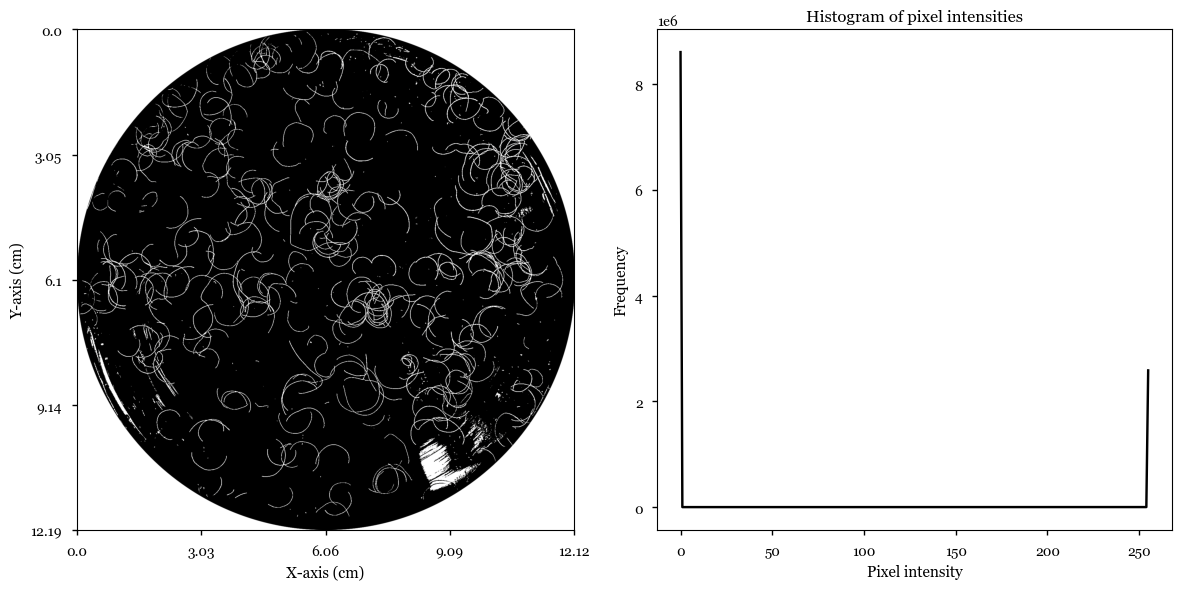

In [2]:
image_path = "/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png"
image = np.array(Image.open(image_path))

plt.style.use('seaborn-notebook')
plt.rcParams['font.family'] = 'Georgia'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].axis('on')

# The area was meansure by hand to be 12.2 cm in diameters
radius_cm = 6.1
pixels_per_cm = image.shape[0] / (2 * radius_cm)
num_ticks = 5
tick_positions = np.linspace(0, image.shape[1] - 1, num_ticks)
tick_labels_cm = [round(position / pixels_per_cm, 2) for position in tick_positions]
axes[0].set_xticks(tick_positions)
axes[0].set_xticklabels(tick_labels_cm)
axes[0].set_xlabel('X-axis (cm)')

tick_positions = np.linspace(0, image.shape[0] - 1, num_ticks)
tick_labels_cm = [round(position / pixels_per_cm, 2) for position in tick_positions]
axes[0].set_yticks(tick_positions)
axes[0].set_yticklabels(tick_labels_cm)
axes[0].set_ylabel('Y-axis (cm)')

hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])


axes[1].plot(hist, color='black')
axes[1].set_title('Histogram of pixel intensities')
axes[1].set_xlabel('Pixel intensity')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


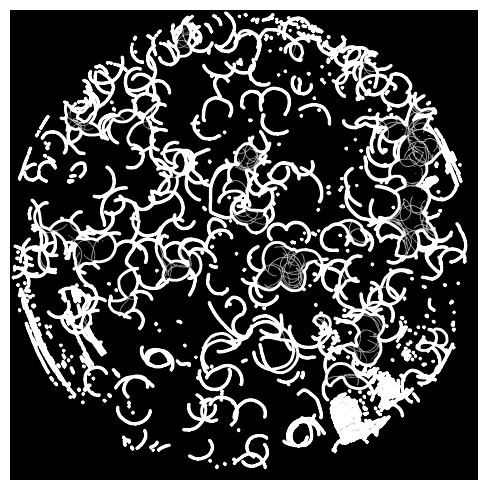

In [3]:
image_path = "/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png"
image = np.array(Image.open(image_path))

image_rgb = image[:, :, :3]

grayscale_image = color.rgb2gray(image_rgb)

threshold = filters.threshold_otsu(grayscale_image)
binary_image = grayscale_image > threshold

segmentation_coins = ndi.binary_fill_holes(binary_image)

contours = measure.find_contours(segmentation_coins.astype(float), 0.5)

fig = plt.subplots(figsize=(10, 5), sharey=True)

plt.imshow(image_rgb)
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, color='white')

#axes[0].imshow(image_rgb)
#for contour in contours:
#    axes[0].plot(contour[:, 1], contour[:, 0], linewidth=2, color='white')

#axes[1].imshow(segmentation_coins, cmap='gray')

#for ax in axes:
#    ax.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()


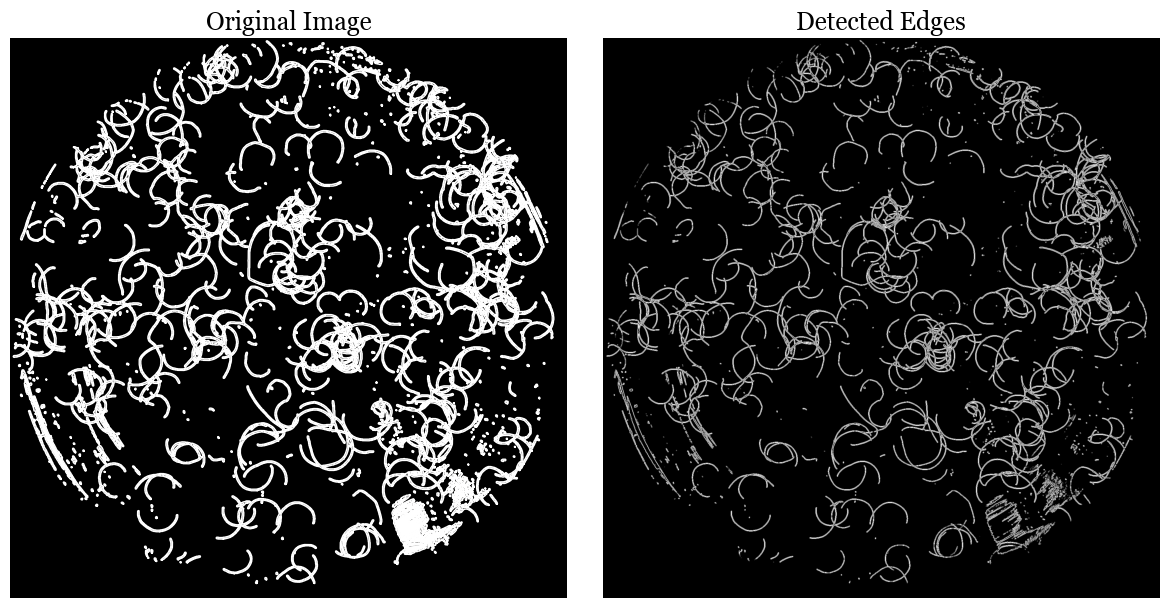

In [4]:
if image.shape[2] == 4:
    image = image[:, :, :3]

gray_image = color.rgb2gray(image)

edges = filters.sobel(gray_image)

contours = measure.find_contours(edges, 0.1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image', fontsize = 18)
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Detected Edges', fontsize = 18)
axes[1].axis('off')

# Plot the contours on the original image
for contour in contours:
    axes[0].plot(contour[:, 1], contour[:, 0], linewidth=1, color='white')

plt.tight_layout()
plt.show()

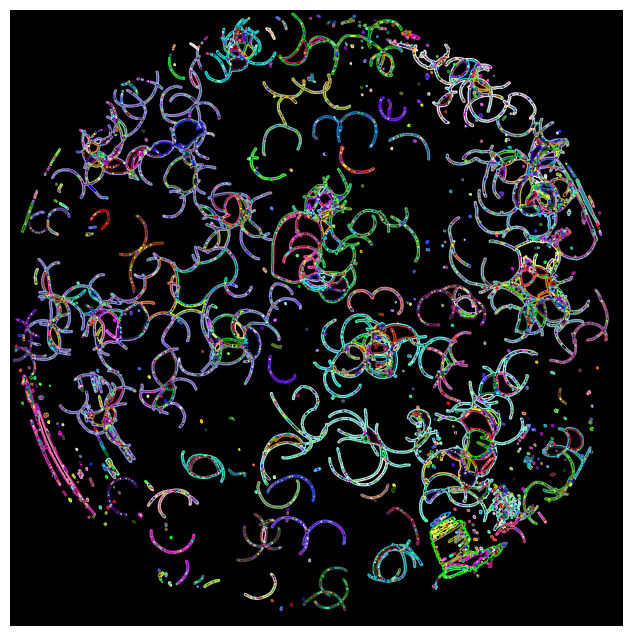

In [348]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure

image_path = "/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png"
image = io.imread(image_path)

# Remove the alpha channel if present
if image.shape[2] == 4:
    image = image[:, :, :3]

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply edge detection
edges = filters.sobel(gray_image)

# Find contours
contours = measure.find_contours(edges, 0.1)

# Plot the original image with a white background
plt.figure(figsize=(8, 8))
plt.imshow(np.ones_like(gray_image), cmap='gray')  # White background
plt.axis('off')

# Plot the contours with different colors
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=1, color=np.random.rand(3))

#plt.savefig("colorful fibers bk bg.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

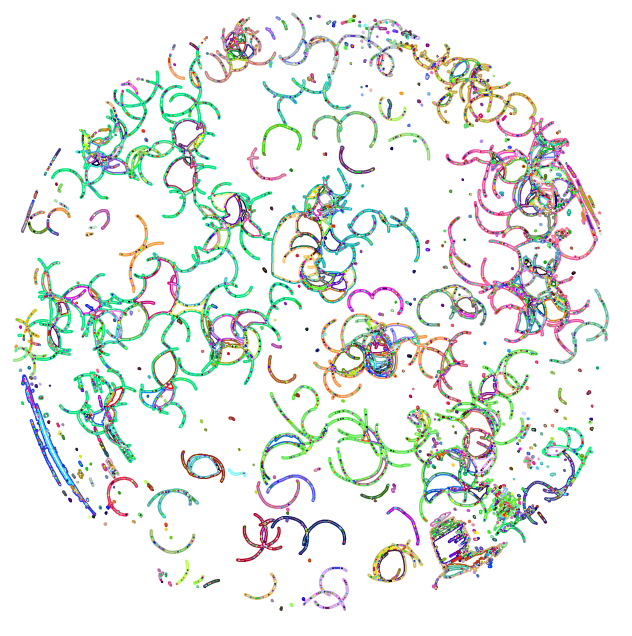

In [347]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure

# Load the image
image_path = "/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png"
image = io.imread(image_path)

# Remove the alpha channel if present
if image.shape[2] == 4:
    image = image[:, :, :3]

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply edge detection
edges = filters.sobel(gray_image)

# Find contours
contours = measure.find_contours(edges, 0.1)

# Plot the original image with a white background
plt.figure(figsize=(8, 8))
plt.imshow(np.ones_like(gray_image), cmap='gray', vmin=0, vmax=1)  # White background
plt.axis('off')

# Plot the contours with different colors
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=1, color=np.random.rand(3))

#plt.savefig("colorful fibers wh bg.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

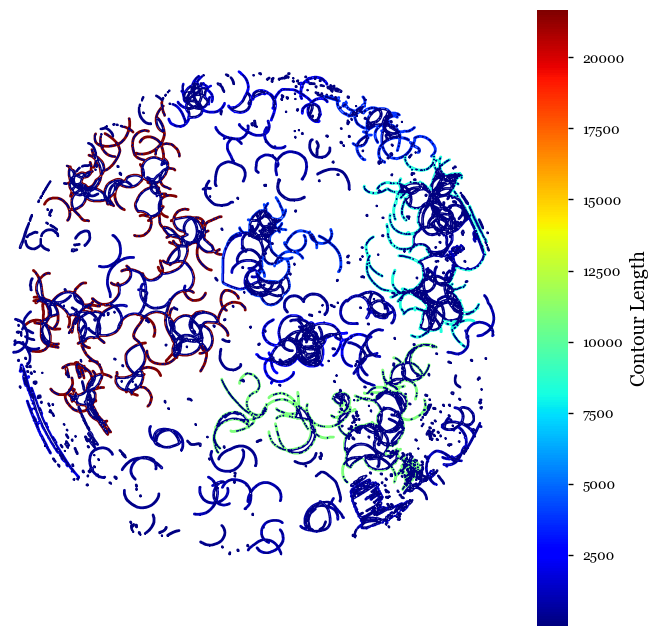

In [349]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
from matplotlib.cm import ScalarMappable

# Load the image
image_path = "/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png"
image = io.imread(image_path)

# Remove the alpha channel if present
if image.shape[2] == 4:
    image = image[:, :, :3]

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply edge detection
edges = filters.sobel(gray_image)

# Find contours
contours = measure.find_contours(edges, 0.1)

# Generate random lengths for the contours (for demonstration)
contour_lengths = [len(contour) for contour in contours]

# Create a colormap based on the contour lengths
cmap = plt.cm.jet
norm = plt.Normalize(vmin=min(contour_lengths), vmax=max(contour_lengths))
scalar_map = ScalarMappable(norm=norm, cmap=cmap)

# Plot the original image with a white background
plt.figure(figsize=(8, 8))
plt.imshow(np.ones_like(gray_image), cmap='gray', vmin=0, vmax=1)  # White background
plt.axis('off')

# Plot the contours with colors from the colormap
for contour, length in zip(contours, contour_lengths):
    color = scalar_map.to_rgba(length)
    plt.plot(contour[:, 1], contour[:, 0], linewidth=1, color=color)

# Add color bar to show the association between contour lengths and colors
cbar = plt.colorbar(scalar_map)
cbar.set_label('Contour Length', fontsize=14)
cbar.outline.set_edgecolor('none') 

#plt.savefig("colorful fibers length in pixels.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

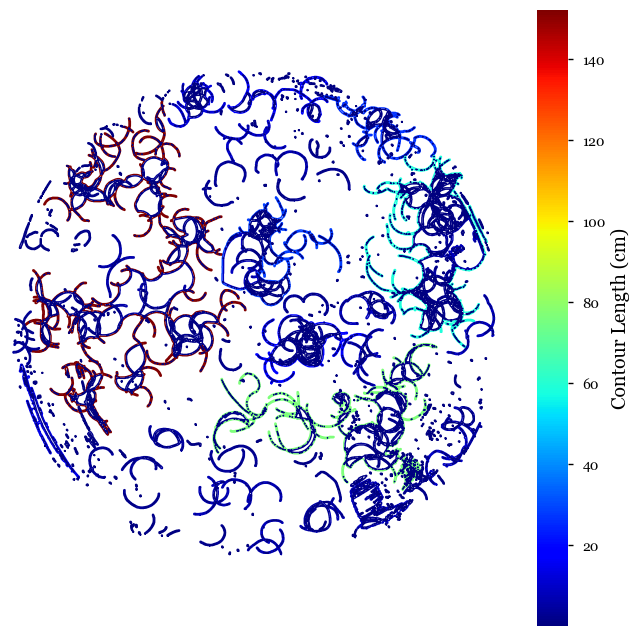

In [350]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
from matplotlib.cm import ScalarMappable

# Load the image
image_path = "/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png"
image = io.imread(image_path)

# Remove the alpha channel if present
if image.shape[2] == 4:
    image = image[:, :, :3]

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply edge detection
edges = filters.sobel(gray_image)

# Find contours
contours = measure.find_contours(edges, 0.1)

# Convert contour lengths from pixels to centimeters
pixels_to_cm = 12.2 / 1737.0648
contour_lengths_cm = [len(contour) * pixels_to_cm for contour in contours]

# Create a colormap based on the contour lengths
cmap = plt.cm.jet
norm = plt.Normalize(vmin=min(contour_lengths_cm), vmax=max(contour_lengths_cm))
scalar_map = ScalarMappable(norm=norm, cmap=cmap)

# Plot the original image with a white background
plt.figure(figsize=(8, 8))
plt.imshow(np.ones_like(gray_image), cmap='gray', vmin=0, vmax=1)  # White background
plt.axis('off')

# Plot the contours with colors from the colormap
for contour, length_cm in zip(contours, contour_lengths_cm):
    color = scalar_map.to_rgba(length_cm)
    plt.plot(contour[:, 1], contour[:, 0], linewidth=1, color=color)

# Add color bar to show the association between contour lengths and colors
cbar = plt.colorbar(scalar_map)
cbar.set_label('Contour Length (cm)', fontsize=14)
cbar.outline.set_edgecolor('none') 

#plt.savefig("colorful fibers length in cm.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()


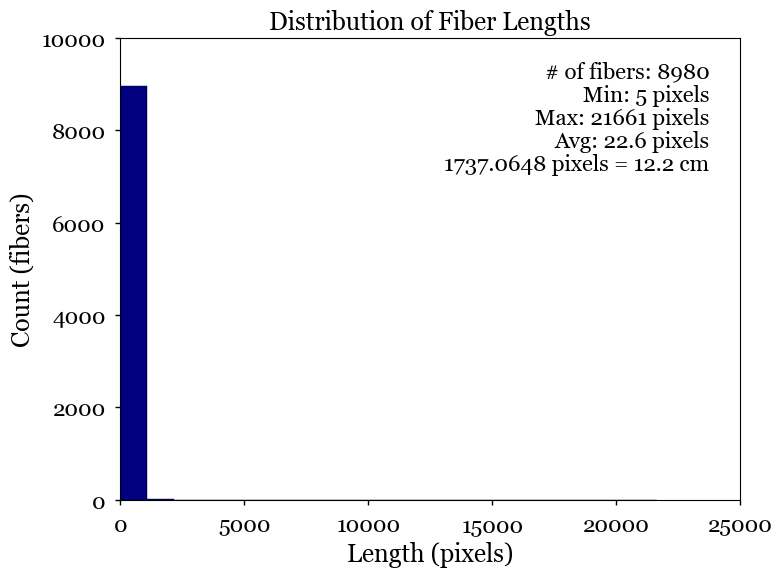

Total number of fibers: 8980
Minimum fiber length: 5 pixels
Maximum fiber length: 21661 pixels
Average fiber length: 22.588195991091315 pixels


In [351]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure

# Load the image
image_path = "/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png"
image = io.imread(image_path)

# Remove the alpha channel if present
if image.shape[2] == 4:
    image = image[:, :, :3]

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply edge detection
edges = filters.sobel(gray_image)

# Find contours
contours = measure.find_contours(edges, 0.1)

# Calculate the length of each contour
fiber_lengths = [len(contour) for contour in contours]

# Count the number of fibers
num_fibers = len(fiber_lengths)

# Plot a histogram of fiber lengths with cmap jet
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(fiber_lengths, bins=20, edgecolor='black')

# Apply colormap to histogram bars
cmap = plt.cm.jet
bin_centers = 0.5 * (bins[:-1] + bins[1:])
colors = cmap((bin_centers - min(bin_centers)) / (max(bin_centers) - min(bin_centers)))

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.title('Distribution of Fiber Lengths', fontsize=18)
plt.xlabel('Length (pixels)', fontsize=18)
plt.ylabel('Count (fibers)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 25000)
plt.ylim(0, 10000)
plt.grid(False)

plt.text(0.95, 0.95, f"# of fibers: {num_fibers}", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.9, f"Min: {np.min(fiber_lengths)} pixels", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.85, f"Max: {np.max(fiber_lengths)} pixels", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.8, f"Avg: {np.mean(fiber_lengths):.1f} pixels", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.75, "1737.0648 pixels = 12.2 cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)

#plt.savefig("histogram in pixels (scipy).png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()
# Print the total number of fibers and their lengths
print(f"Total number of fibers: {num_fibers}")
print(f"Minimum fiber length: {np.min(fiber_lengths)} pixels")
print(f"Maximum fiber length: {np.max(fiber_lengths)} pixels")
print(f"Average fiber length: {np.mean(fiber_lengths)} pixels")


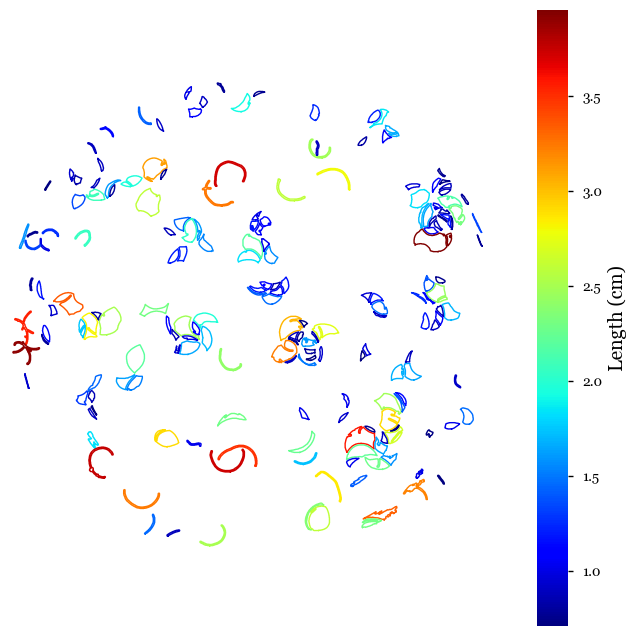

In [352]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
from matplotlib.cm import ScalarMappable

# Load the image
image_path = "/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png"
image = io.imread(image_path)

# Remove the alpha channel if present
if image.shape[2] == 4:
    image = image[:, :, :3]

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply edge detection
edges = filters.sobel(gray_image)

# Find contours
contours = measure.find_contours(edges, 0.1)

# Convert contour lengths from pixels to centimeters
pixels_to_cm = 12.2 / 1737.0648
contour_lengths_cm = [len(contour) * pixels_to_cm for contour in contours]

# Filter out contours smaller than 0.7 cm and larger than 4 cm
filtered_contours = []
filtered_lengths_cm = []
for contour, length_cm in zip(contours, contour_lengths_cm):
    if 0.7 <= length_cm <= 4:
        filtered_contours.append(contour)
        filtered_lengths_cm.append(length_cm)

# Create a colormap based on the contour lengths
cmap = plt.cm.jet
norm = plt.Normalize(vmin=min(filtered_lengths_cm), vmax=max(filtered_lengths_cm))
scalar_map = ScalarMappable(norm=norm, cmap=cmap)

# Plot the original image with a white background
plt.figure(figsize=(8, 8))
plt.imshow(np.ones_like(gray_image), cmap='gray', vmin=0, vmax=1)  # White background
plt.axis('off')

# Plot the filtered contours with colors from the colormap
for contour, length_cm in zip(filtered_contours, filtered_lengths_cm):
    color = scalar_map.to_rgba(length_cm)
    plt.plot(contour[:, 1], contour[:, 0], linewidth=1, color=color)

# Add color bar to show the association between contour lengths and colors
cbar = plt.colorbar(scalar_map)
cbar.set_label('Length (cm)', fontsize=14)
cbar.outline.set_edgecolor('none') 

#plt.savefig("colorful fibers length filtered in cm (scipy).png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()


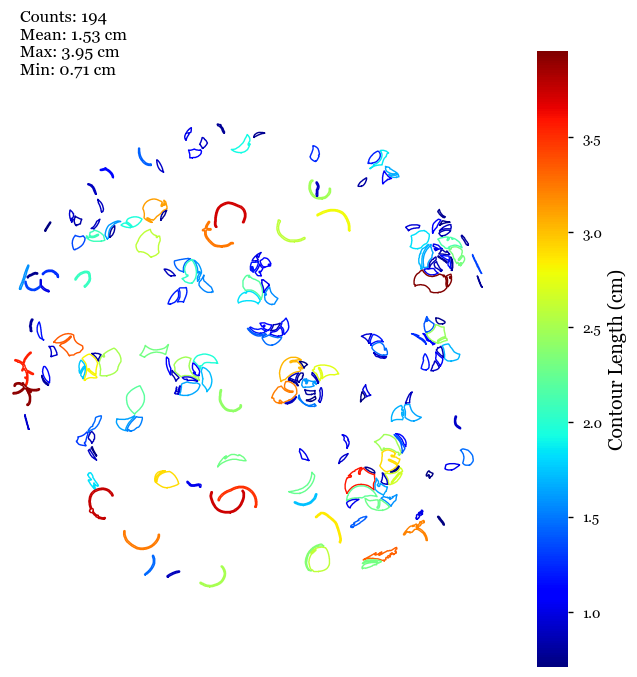

In [284]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
from matplotlib.cm import ScalarMappable

# Load the image
image_path = "/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png"
image = io.imread(image_path)

# Remove the alpha channel if present
if image.shape[2] == 4:
    image = image[:, :, :3]

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply edge detection
edges = filters.sobel(gray_image)

# Find contours
contours = measure.find_contours(edges, 0.1)

# Convert contour lengths from pixels to centimeters
pixels_to_cm = 12.2 / 1737.0648
contour_lengths_cm = [len(contour) * pixels_to_cm for contour in contours]

# Filter out contours smaller than 0.7 cm and larger than 4 cm
filtered_contours = []
filtered_lengths_cm = []
for contour, length_cm in zip(contours, contour_lengths_cm):
    if 0.7 <= length_cm <= 4:
        filtered_contours.append(contour)
        filtered_lengths_cm.append(length_cm)

# Create a colormap based on the contour lengths
cmap = plt.cm.jet
norm = plt.Normalize(vmin=min(filtered_lengths_cm), vmax=max(filtered_lengths_cm))
scalar_map = ScalarMappable(norm=norm, cmap=cmap)

# Plot the original image with a white background
plt.figure(figsize=(8, 8))
plt.imshow(np.ones_like(gray_image), cmap='gray', vmin=0, vmax=1)  # White background
plt.axis('off')

# Plot the filtered contours with colors from the colormap
for contour, length_cm in zip(filtered_contours, filtered_lengths_cm):
    color = scalar_map.to_rgba(length_cm)
    plt.plot(contour[:, 1], contour[:, 0], linewidth=1, color=color)

# Add color bar to show the association between contour lengths and colors
cbar = plt.colorbar(scalar_map)
cbar.set_label('Contour Length (cm)', fontsize=14)
cbar.outline.set_edgecolor('none') 

# Print information on the plot
num_counts = len(filtered_contours)
mean_length = np.mean(filtered_lengths_cm)
max_length = np.max(filtered_lengths_cm)
min_length = np.min(filtered_lengths_cm)
info_text = f"Counts: {num_counts}\nMean: {mean_length:.2f} cm\nMax: {max_length:.2f} cm\nMin: {min_length:.2f} cm"
plt.text(0.02, 1.2, info_text, transform=plt.gca().transAxes, verticalalignment='top', fontsize=12, color='black')

plt.show()


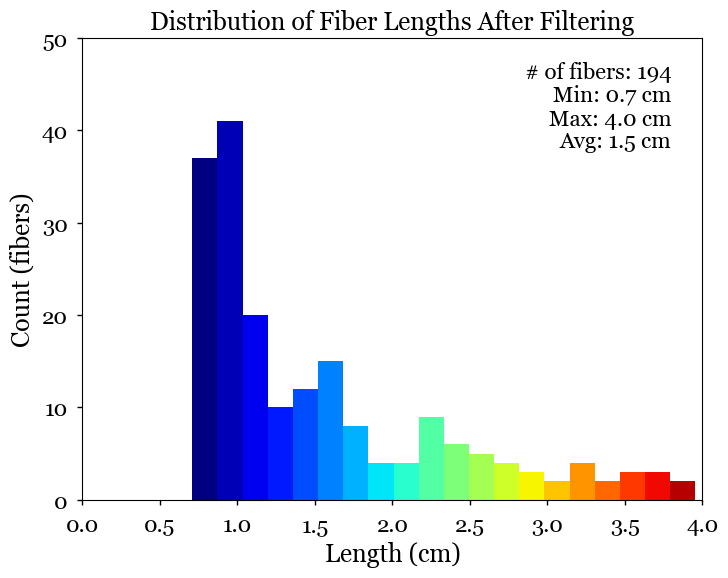

Total number of fibers after filtering: 194
Minimum fiber length after filtering: 0.71 cm
Maximum fiber length after filtering: 3.95 cm
Average fiber length after filtering: 1.53 cm


In [297]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the length of each contour in pixels
fiber_lengths_pixels = [len(contour) for contour in contours]

# Convert pixel lengths to centimeters
pixels_to_cm = 12.2 / 1737.0648
fiber_lengths_cm = [length * pixels_to_cm for length in fiber_lengths_pixels]

# Filter out fiber lengths longer than 5 cm and shorter than 0.5 cm
filtered_lengths_cm = [length for length in fiber_lengths_cm if 0.7 <= length <= 4]

# Count the number of fibers after filtering
num_fibers_filtered = len(filtered_lengths_cm)

# Plot a histogram of fiber lengths with cmap jet
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(filtered_lengths_cm, bins=20, edgecolor='maroon', linewidth=0, alpha=1)
for i, patch in enumerate(patches):
    color = plt.cm.jet(i / len(patches))  # Generate a color from the jet colormap for each bar
    patch.set_facecolor(color)
plt.title('Distribution of Fiber Lengths After Filtering', fontsize=18)
plt.xlabel('Length (cm)', fontsize=18)
plt.ylabel('Count (fibers)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 4)
plt.ylim(0, 50)
plt.grid(False)

# Add summary annotations on the plot
plt.text(0.95, 0.95, f"# of fibers: {num_fibers_filtered}", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.9, f"Min: {np.min(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.85, f"Max: {np.max(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.8, f"Avg: {np.mean(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)

plt.show()

# Print the total number of fibers after filtering
print(f"Total number of fibers after filtering: {num_fibers_filtered}")
print(f"Minimum fiber length after filtering: {np.min(filtered_lengths_cm):.2f} cm")
print(f"Maximum fiber length after filtering: {np.max(filtered_lengths_cm):.2f} cm")
print(f"Average fiber length after filtering: {np.mean(filtered_lengths_cm):.2f} cm")


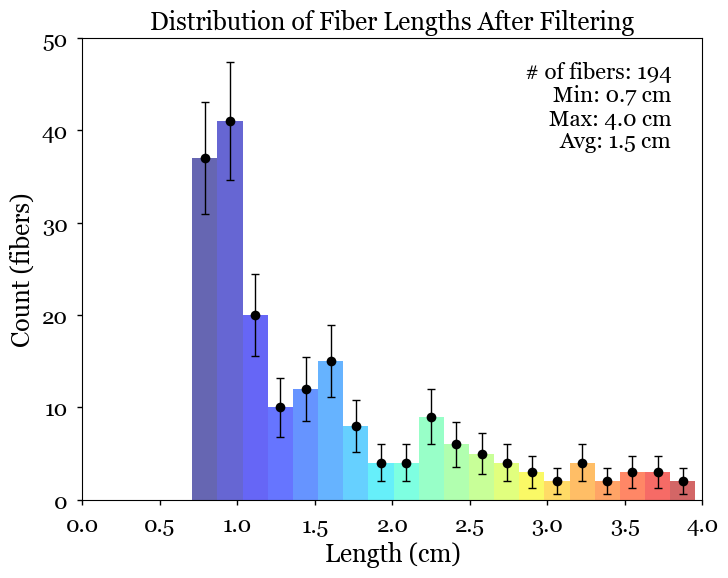

Total number of fibers after filtering: 194
Minimum fiber length after filtering: 0.71 cm
Maximum fiber length after filtering: 3.95 cm
Average fiber length after filtering: 1.53 cm


In [331]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the length of each contour in pixels
fiber_lengths_pixels = [len(contour) for contour in contours]

# Convert pixel lengths to centimeters
pixels_to_cm = 12.2 / 1737.0648
fiber_lengths_cm = [length * pixels_to_cm for length in fiber_lengths_pixels]

# Filter out fiber lengths longer than 5 cm and shorter than 0.5 cm
filtered_lengths_cm = [length for length in fiber_lengths_cm if 0.7 <= length <= 4]

# Count the number of fibers after filtering
num_fibers_filtered = len(filtered_lengths_cm)

# Plot a histogram of fiber lengths with cmap jet
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(filtered_lengths_cm, bins=20, edgecolor='maroon', linewidth=0, alpha=0.6)
for i, patch in enumerate(patches):
    color = plt.cm.jet(i / len(patches))  # Generate a color from the jet colormap for each bar
    patch.set_facecolor(color)

# Calculate the count and error bars for each bin
counts, bin_edges = np.histogram(filtered_lengths_cm, bins=20)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
errors = np.sqrt(counts)

# Add error bars to the plot
plt.errorbar(bin_centers, counts, yerr=errors, fmt='o', ecolor='black', color = 'k', lw=1, capsize=3, capthick=1)

plt.title('Distribution of Fiber Lengths After Filtering', fontsize=18)
plt.xlabel('Length (cm)', fontsize=18)
plt.ylabel('Count (fibers)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 4)
plt.ylim(0, 50)
plt.grid(False)

# Add summary annotations on the plot
plt.text(0.95, 0.95, f"# of fibers: {num_fibers_filtered}", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.9, f"Min: {np.min(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.85, f"Max: {np.max(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.8, f"Avg: {np.mean(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)

plt.show()

# Print the total number of fibers after filtering
print(f"Total number of fibers after filtering: {num_fibers_filtered}")
print(f"Minimum fiber length after filtering: {np.min(filtered_lengths_cm):.2f} cm")
print(f"Maximum fiber length after filtering: {np.max(filtered_lengths_cm):.2f} cm")
print(f"Average fiber length after filtering: {np.mean(filtered_lengths_cm):.2f} cm")


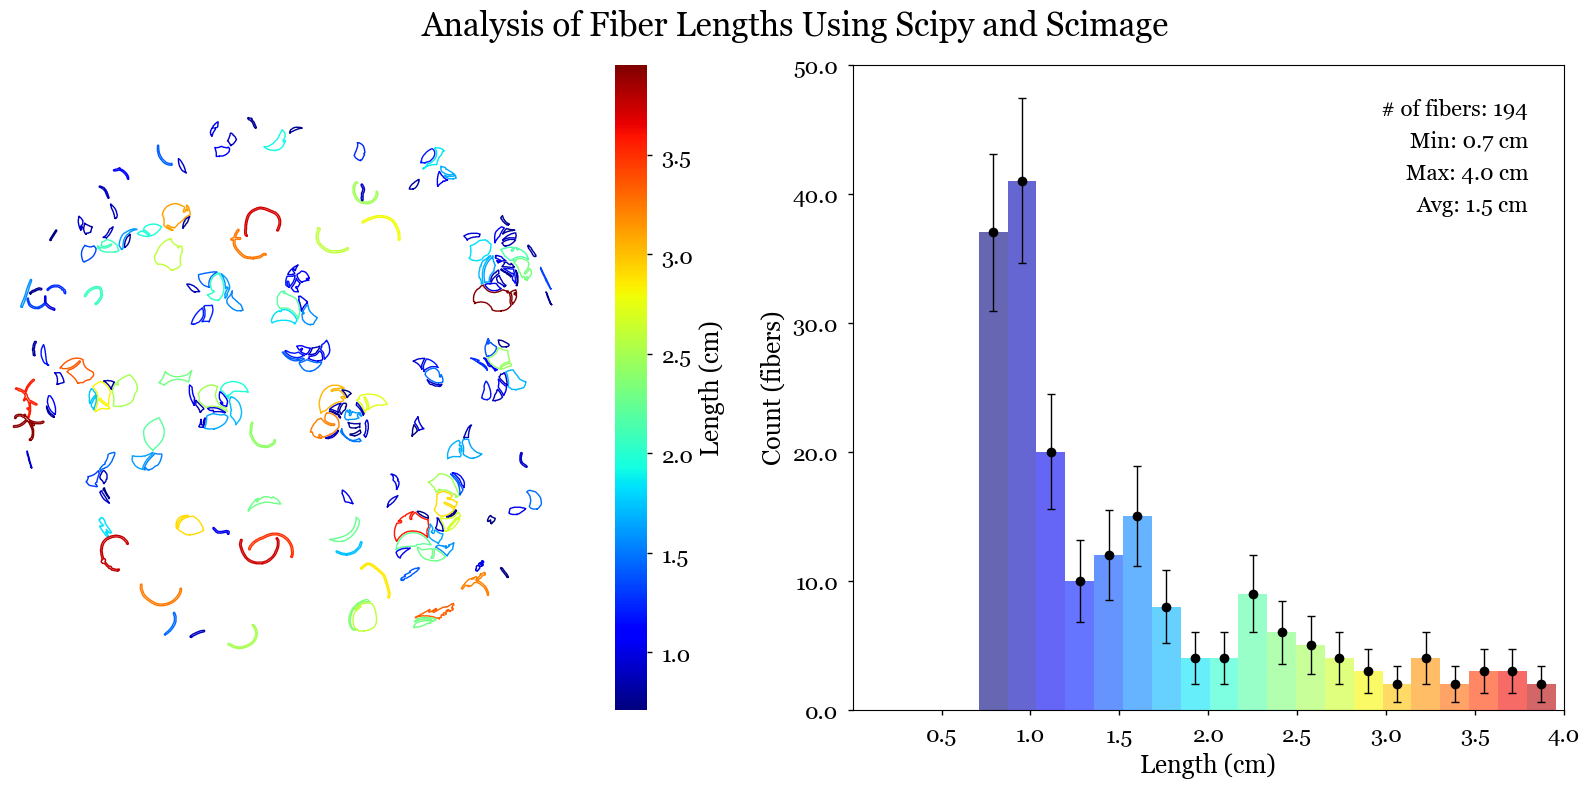

In [353]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
from matplotlib.cm import ScalarMappable

# Load the image
image_path = "/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png"
image = io.imread(image_path)

# Remove the alpha channel if present
if image.shape[2] == 4:
    image = image[:, :, :3]

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply edge detection
edges = filters.sobel(gray_image)

# Find contours
contours = measure.find_contours(edges, 0.1)

# Convert contour lengths from pixels to centimeters
pixels_to_cm = 12.2 / 1737.0648
contour_lengths_cm = [len(contour) * pixels_to_cm for contour in contours]

# Filter out contours smaller than 0.7 cm and larger than 4 cm
filtered_contours = []
filtered_lengths_cm = []
for contour, length_cm in zip(contours, contour_lengths_cm):
    if 0.7 <= length_cm <= 4:
        filtered_contours.append(contour)
        filtered_lengths_cm.append(length_cm)

# Create a colormap based on the contour lengths
cmap = plt.cm.jet
norm = plt.Normalize(vmin=min(filtered_lengths_cm), vmax=max(filtered_lengths_cm))
scalar_map = ScalarMappable(norm=norm, cmap=cmap)

# Create a figure and axes for the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot the image with contours
ax1.imshow(np.ones_like(gray_image), cmap='gray', vmin=0, vmax=1)  # White background
ax1.axis('off')

# Plot the filtered contours with colors from the colormap
for contour, length_cm in zip(filtered_contours, filtered_lengths_cm):
    color = scalar_map.to_rgba(length_cm)
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=1, color=color)

# Add color bar to show the association between contour lengths and colors
cbar = plt.colorbar(scalar_map, ax=ax1, orientation='vertical')
cbar.set_label('Length (cm)', fontsize=18)
cbar.outline.set_edgecolor('none')
cbar.ax.tick_params(labelsize=16)

# Print information on the plot
num_counts = len(filtered_contours)
mean_length = np.mean(filtered_lengths_cm)
max_length = np.max(filtered_lengths_cm)
min_length = np.min(filtered_lengths_cm)
info_text = f"Counts: {num_counts}\nMean: {mean_length:.2f} cm\nMax: {max_length:.2f} cm\nMin: {min_length:.2f} cm"
#ax1.text(0.02, 1.2, info_text, transform=ax1.transAxes, verticalalignment='top', fontsize=12, color='black')

# Plot the histogram of fiber lengths
fiber_lengths_pixels = [len(contour) for contour in contours]
pixels_to_cm = 12.2 / 1737.0648
fiber_lengths_cm = [length * pixels_to_cm for length in fiber_lengths_pixels]
filtered_lengths_cm = [length for length in fiber_lengths_cm if 0.7 <= length <= 4]

n, bins, patches = ax2.hist(filtered_lengths_cm, bins=20, linewidth=0, alpha=0.6)
for i, patch in enumerate(patches):
    color = plt.cm.jet(i / len(patches)) 
    patch.set_facecolor(color)

counts, bin_edges = np.histogram(filtered_lengths_cm, bins=20)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
errors = np.sqrt(counts)
ax2.errorbar(bin_centers, counts, yerr=errors, fmt='o', ecolor='black', color='k', lw=1, capsize=3, capthick=1)

#ax2.set_title('Distribution of Fiber Lengths After Filtering', fontsize=18)
ax2.set_xlabel('Length (cm)', fontsize=18)
ax2.set_ylabel('Count (fibers)', fontsize=18)
ax2.set_xticks(ax2.get_xticks())
ax2.set_yticks(ax2.get_yticks())
ax2.set_xticklabels(ax2.get_xticks(), fontsize=16)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=16)
ax2.set_xlim(0, 4)
ax2.set_ylim(0, 50)
ax2.grid(False)

# Add summary annotations on the plot
ax2.text(0.95, 0.95, f"# of fibers: {num_fibers_filtered}", ha='right', va='top', transform=ax2.transAxes, fontsize=16)
ax2.text(0.95, 0.9, f"Min: {np.min(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=ax2.transAxes, fontsize=16)
ax2.text(0.95, 0.85, f"Max: {np.max(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=ax2.transAxes, fontsize=16)
ax2.text(0.95, 0.8, f"Avg: {np.mean(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=ax2.transAxes, fontsize=16)

fig.suptitle('Analysis of Fiber Lengths Using Scipy and Scimage', fontsize=24)

plt.tight_layout()

plt.savefig("sum scipy.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

# Print the total number of fibers after filtering
#print(f"Total number of fibers after filtering: {num_fibers_filtered}")
#print(f"Minimum fiber length after filtering: {np.min(filtered_lengths_cm):.2f} cm")
#print(f"Maximum fiber length after filtering: {np.max(filtered_lengths_cm):.2f} cm")
#print(f"Average fiber length after filtering: {np.mean(filtered_lengths_cm):.2f} cm")

# Finding the fiber lenghs through OpenCV

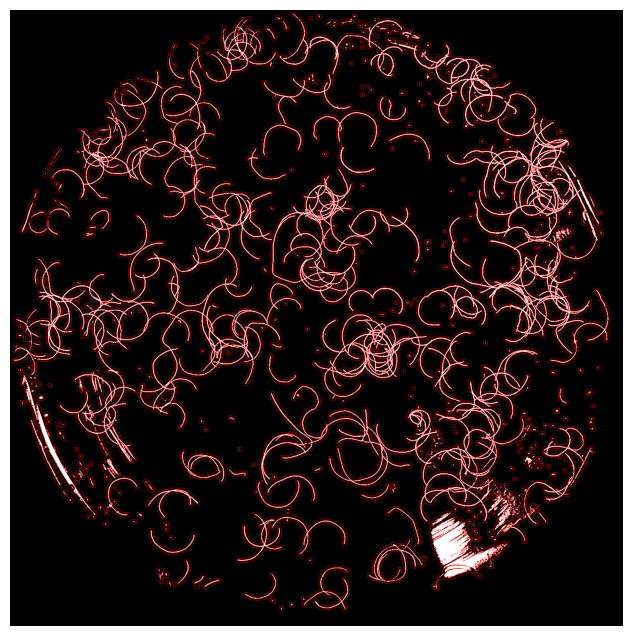

In [356]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread("/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw contours on the original image
contour_image = cv2.drawContours(image.copy(), contours, -1, (0, 0, 255), 0)  # Draw contours in green with thickness 1

# Display the original image with contours
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

#plt.savefig("raw Open CV in red.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()


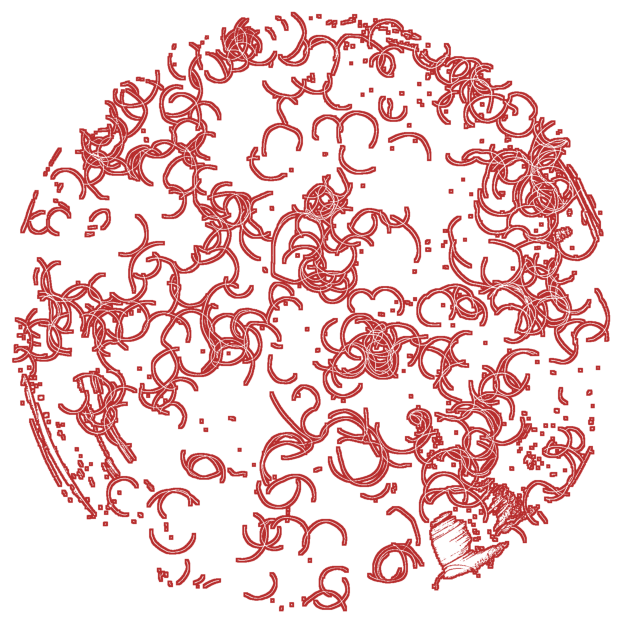

In [303]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread("/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png")

# Create a white background image
background_image = np.ones_like(image) * 255  # Fills the image with white color (255)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw contours on the white background image
contour_image = cv2.drawContours(background_image, contours, -1, (45, 45, 183), thickness=cv2.FILLED)  # Draw filled contours in black
# Display the original image with contours
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



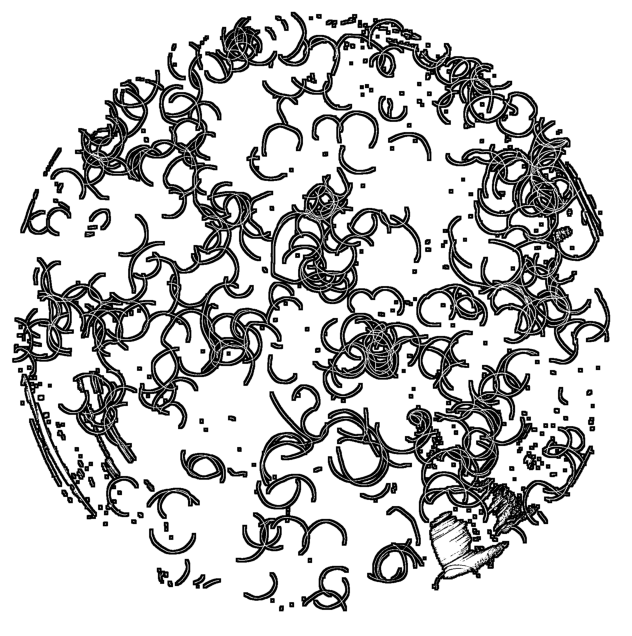

In [304]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread("/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png")

# Create a white background image
background_image = np.ones_like(image) * 255  # Fills the image with white color (255)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw contours on the white background image
contour_image = cv2.drawContours(background_image, contours, -1, (0, 0, 0), thickness=cv2.FILLED)  # Draw filled contours in black

# Display the original image with contours
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



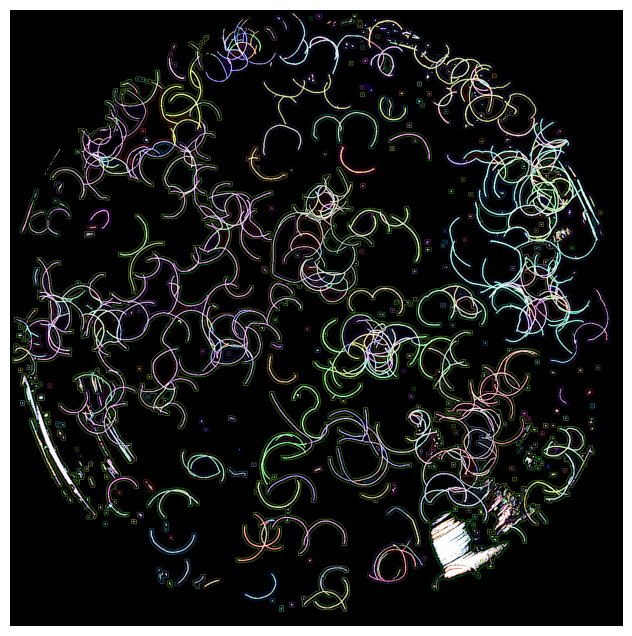

In [305]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread("/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw contours on the original image with solid colors
contour_image = image.copy()
for contour in contours:
    color = (np.random.randint(0, 259), np.random.randint(0, 259), np.random.randint(0, 259))  # Generate a random color
    contour_image = cv2.drawContours(contour_image, [contour], -1, color, thickness=0)  # Draw solid contour

# Display the original image with contours
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


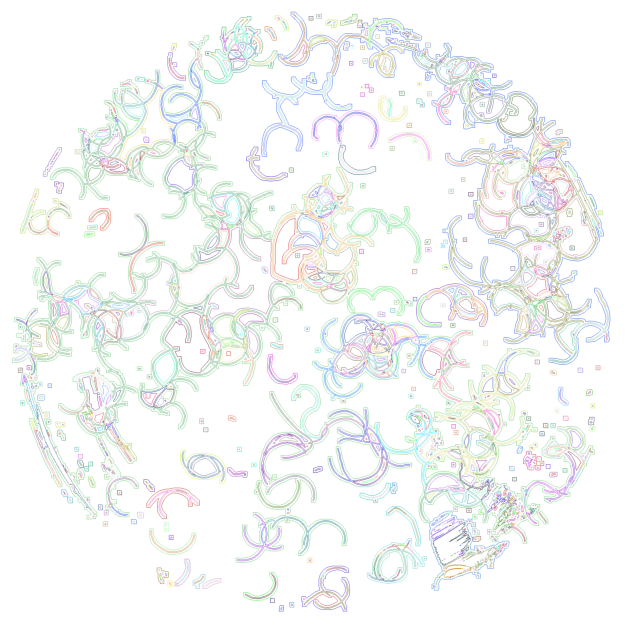

In [306]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread("/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png")

# Create a white background image
background_image = np.ones_like(image) * 255  # Fills the image with white color (255)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw contours on the white background image with random colors
contour_image = background_image.copy()
for contour in contours:
    color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))  # Generate a random color
    contour_image = cv2.drawContours(contour_image, [contour], -1, color, thickness=1)  # Draw filled contour

# Display the original image with contours
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


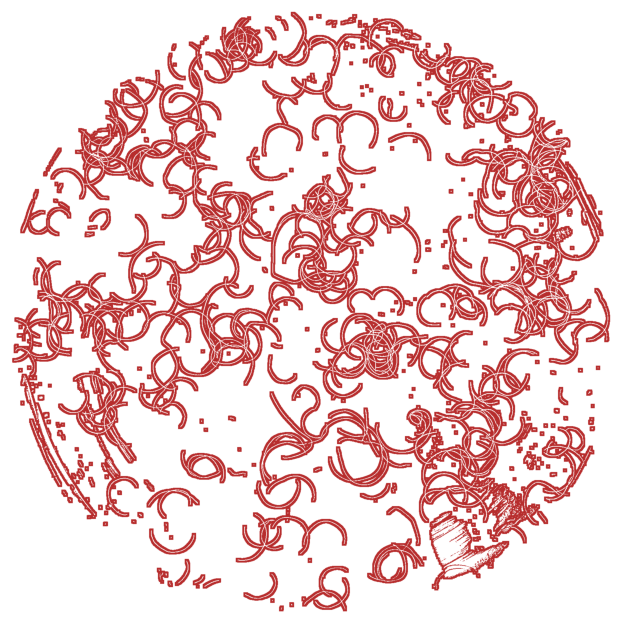

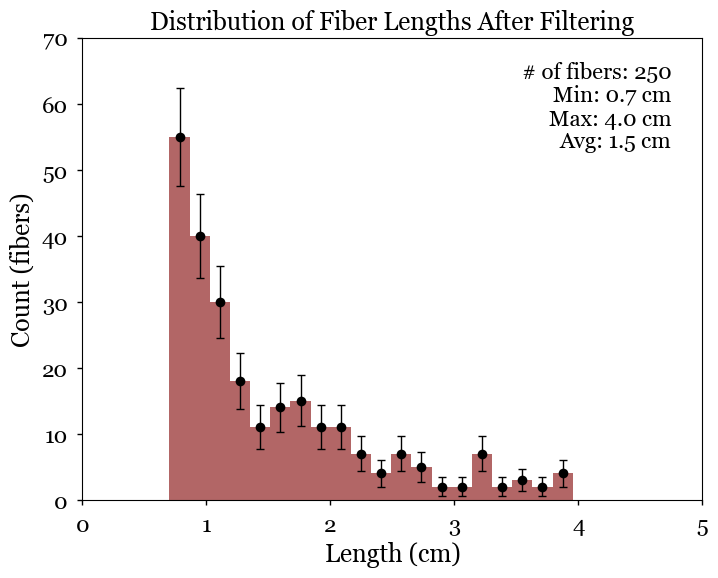

In [355]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread("/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png")

# Create a white background image
background_image = np.ones_like(image) * 255  # Fills the image with white color (255)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw contours on the white background image
contour_image = cv2.drawContours(background_image, contours, -1, (45, 45, 183), thickness=cv2.FILLED)  # Draw filled contours in black
# Display the original image with contours
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# Calculate the length of each contour in pixels
fiber_lengths_pixels = [len(contour) for contour in contours]

# Convert pixel lengths to centimeters
pixels_to_cm = 12.2 / 1737.0648
fiber_lengths_cm = [length * pixels_to_cm for length in fiber_lengths_pixels]

# Filter out fiber lengths longer than 5 cm and shorter than 0.5 cm
filtered_lengths_cm = [length for length in fiber_lengths_cm if 0.7 <= length <= 4]

# Count the number of fibers after filtering
num_fibers_filtered = len(filtered_lengths_cm)

# Plot a histogram of fiber lengths
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(filtered_lengths_cm, bins=20, color='maroon', edgecolor='maroon', linewidth = 0, alpha=0.6)
plt.title('Distribution of Fiber Lengths After Filtering', fontsize=18)
plt.xlabel('Length (cm)', fontsize=18)
plt.ylabel('Count (fibers)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 5)
plt.ylim(0, 70)
plt.grid(False)

# Calculate error bars
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]
error = np.sqrt(n)
#print(n)
# Add error bars
#plt.errorbar(bin_centers, n, xerr=bin_width/2, yerr=error, fmt='o', ecolor='black', lw=1, capsize=3, capthick=1)
plt.errorbar(bin_centers, n, yerr=error, fmt='o', ecolor='black', color = 'k', lw=1, capsize=3, capthick=1)

# Add summary annotations on the plot
plt.text(0.95, 0.95, f"# of fibers: {num_fibers_filtered}", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.9, f"Min: {np.min(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.85, f"Max: {np.max(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.8, f"Avg: {np.mean(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)

#plt.savefig("sum Open CV in red.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

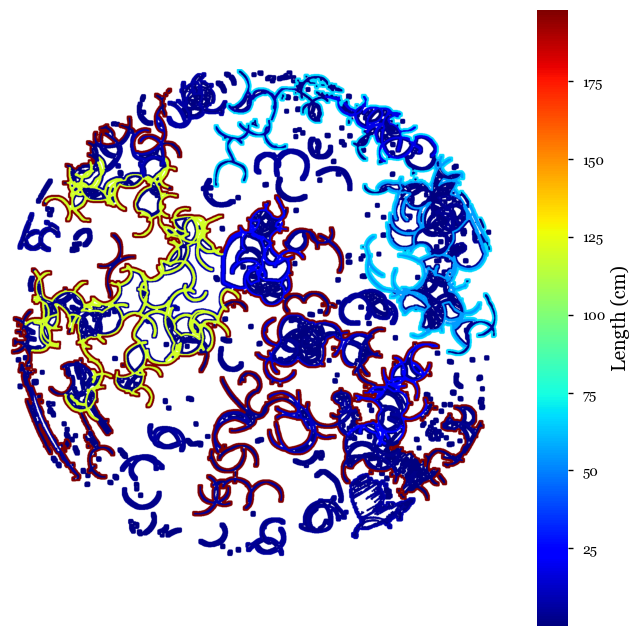

In [314]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Load the original image
image = cv2.imread("/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png")

# Create a white background image
background_image = np.ones_like(image) * 255  # Fills the image with white color (255)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw contours on the white background image
contour_image = cv2.drawContours(background_image, contours, -1, (45, 45, 183), thickness=1)  # Draw filled contours in black

# Calculate the length of each contour in pixels
fiber_lengths_pixels = [len(contour) for contour in contours]

# Convert pixel lengths to centimeters
pixels_to_cm = 12.2 / 1737.0648
fiber_lengths_cm = [length * pixels_to_cm for length in fiber_lengths_pixels]

# Create a colormap based on contour lengths in cm
cmap = plt.cm.jet
norm = plt.Normalize(vmin=min(fiber_lengths_cm), vmax=max(fiber_lengths_cm))
scalar_map = ScalarMappable(norm=norm, cmap=cmap)

# Draw each contour with a color based on its length in cm
for contour, length_cm in zip(contours, fiber_lengths_cm):
    color = scalar_map.to_rgba(length_cm)
    contour_image = cv2.drawContours(contour_image, [contour], -1, (color[2] * 255, color[1] * 255, color[0] * 255), thickness=5)  

# Display the original image with contours and color bar
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
ax.axis('off')
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical')
cbar.set_label('Length (cm)', fontsize=14)
cbar.outline.set_edgecolor('none') 
plt.show()


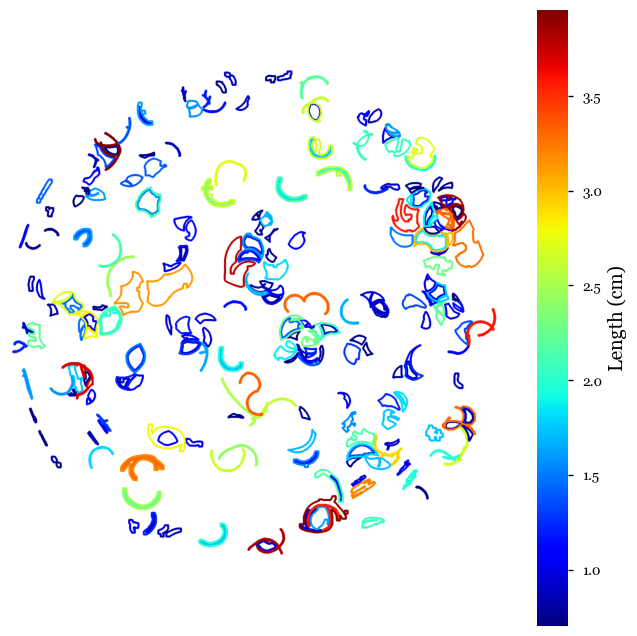

Number of counts: 250
Mean length: 1.51 cm
Max length: 3.95 cm
Min length: 0.70 cm


In [309]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Load the original image
image = cv2.imread("/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png")

# Create a white background image
background_image = np.ones_like(image) * 255  # Fills the image with white color (255)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Filter out contours with lengths less than 0.5 cm and more than 4 cm
filtered_contours = []
for contour in contours:
    length_pixels = len(contour)
    length_cm = length_pixels * (12.2 / 1737.0648)
    if 0.7 <= length_cm <= 4:
        filtered_contours.append(contour)

# Draw contours on the white background image
contour_image = cv2.drawContours(background_image, filtered_contours, -1, (45, 45, 183), thickness=2)  # Draw filled contours in black

# Calculate the length of each filtered contour in pixels and centimeters
fiber_lengths_pixels = [len(contour) for contour in filtered_contours]
pixels_to_cm = 12.2 / 1737.0648
fiber_lengths_cm = [length * pixels_to_cm for length in fiber_lengths_pixels]

# Create a colormap based on contour lengths in cm
cmap = plt.cm.jet
norm = plt.Normalize(vmin=min(fiber_lengths_cm), vmax=max(fiber_lengths_cm))
scalar_map = ScalarMappable(norm=norm, cmap=cmap)

# Draw each contour with a color based on its length in cm
for contour, length_cm in zip(filtered_contours, fiber_lengths_cm):
    color = scalar_map.to_rgba(length_cm)
    contour_image = cv2.drawContours(contour_image, [contour], -1, (color[2] * 255, color[1] * 255, color[0] * 255), thickness=5)  

# Display the original image with contours and color bar
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
ax.axis('off')
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical')
cbar.outline.set_edgecolor('none') 
cbar.set_label('Length (cm)', fontsize=14)
plt.show()

num_counts = len(filtered_contours)
mean_length = np.mean(fiber_lengths_cm)
max_length = np.max(fiber_lengths_cm)
min_length = np.min(fiber_lengths_cm)
print(f"Number of counts: {num_counts}")
print(f"Mean length: {mean_length:.2f} cm")
print(f"Max length: {max_length:.2f} cm")
print(f"Min length: {min_length:.2f} cm")


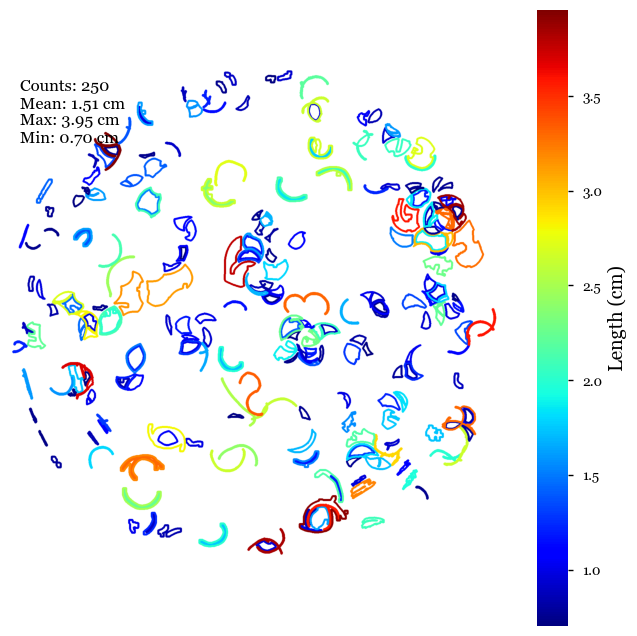

In [310]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Load the original image
image = cv2.imread("/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png")

# Create a white background image
background_image = np.ones_like(image) * 255  # Fills the image with white color (255)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Filter out contours with lengths less than 0.5 cm and more than 4 cm
filtered_contours = []
for contour in contours:
    length_pixels = len(contour)
    length_cm = length_pixels * (12.2 / 1737.0648)
    if 0.7 <= length_cm <= 4:
        filtered_contours.append(contour)

# Draw contours on the white background image
contour_image = cv2.drawContours(background_image, filtered_contours, -1, (45, 45, 183), thickness=1)  # Draw filled contours in black

# Calculate the length of each filtered contour in pixels and centimeters
fiber_lengths_pixels = [len(contour) for contour in filtered_contours]
pixels_to_cm = 12.2 / 1737.0648
fiber_lengths_cm = [length * pixels_to_cm for length in fiber_lengths_pixels]

# Create a colormap based on contour lengths in cm
cmap = plt.cm.jet
norm = plt.Normalize(vmin=min(fiber_lengths_cm), vmax=max(fiber_lengths_cm))
scalar_map = ScalarMappable(norm=norm, cmap=cmap)

# Draw each contour with a color based on its length in cm
for contour, length_cm in zip(filtered_contours, fiber_lengths_cm):
    color = scalar_map.to_rgba(length_cm)
    contour_image = cv2.drawContours(contour_image, [contour], -1, (color[2] * 255, color[1] * 255, color[0] * 255), thickness=5)  

# Display the original image with contours and color bar
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
ax.axis('off')
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical')
cbar.outline.set_edgecolor('none') 
cbar.set_label('Length (cm)', fontsize=14)

# Print the number of counts, mean length, max length, and min length
num_counts = len(filtered_contours)
mean_length = np.mean(fiber_lengths_cm)
max_length = np.max(fiber_lengths_cm)
min_length = np.min(fiber_lengths_cm)
info_text = f"Counts: {num_counts}\nMean: {mean_length:.2f} cm\nMax: {max_length:.2f} cm\nMin: {min_length:.2f} cm"
plt.text(0.02, 0.98, info_text, transform=ax.transAxes, verticalalignment='top', fontsize=12, color='black')

plt.show()


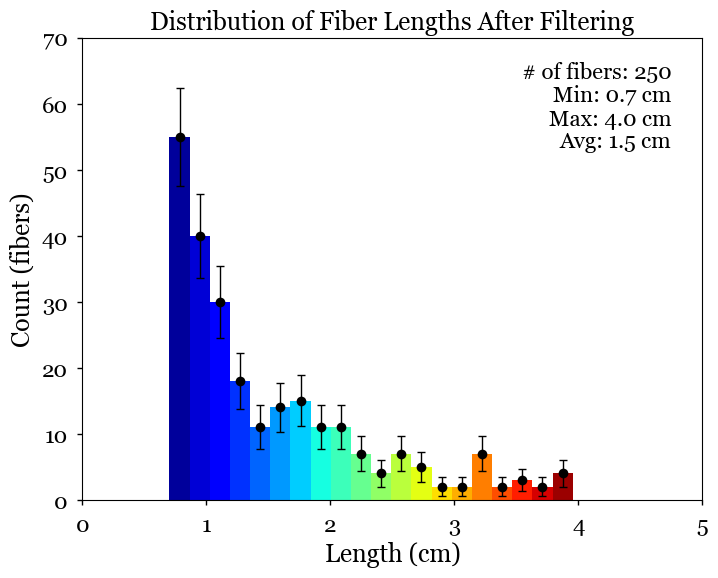

In [311]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Load the original image
image = cv2.imread("/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png")

# Create a white background image
background_image = np.ones_like(image) * 255  # Fills the image with white color (255)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Filter out contours with lengths less than 0.5 cm and more than 4 cm
filtered_contours = []
for contour in contours:
    length_pixels = len(contour)
    length_cm = length_pixels * (12.2 / 1737.0648)
    if 0.7 <= length_cm <= 4:
        filtered_contours.append(contour)

# Draw contours on the white background image
contour_image = cv2.drawContours(background_image, filtered_contours, -1, (45, 45, 183), thickness=1)  # Draw filled contours in black

# Calculate the length of each filtered contour in pixels and centimeters
fiber_lengths_pixels = [len(contour) for contour in filtered_contours]
pixels_to_cm = 12.2 / 1737.0648
fiber_lengths_cm = [length * pixels_to_cm for length in fiber_lengths_pixels]

# Create a colormap based on contour lengths in cm
cmap = plt.cm.jet
norm = plt.Normalize(vmin=min(fiber_lengths_cm), vmax=max(fiber_lengths_cm))
scalar_map = ScalarMappable(norm=norm, cmap=cmap)

# Plot a histogram of fiber lengths
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(filtered_lengths_cm, bins=20, edgecolor='maroon', linewidth=0, alpha=1)
plt.title('Distribution of Fiber Lengths After Filtering', fontsize=18)
plt.xlabel('Length (cm)', fontsize=18)
plt.ylabel('Count (fibers)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 5)
plt.ylim(0, 70)
plt.grid(False)

# Assign colors to histogram bars based on length values
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for length, patch in zip(bin_centers, patches):
    color = scalar_map.to_rgba(length)
    patch.set_facecolor(color)

# Calculate error bars
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]
error = np.sqrt(n)
#print(n)
# Add error bars
#plt.errorbar(bin_centers, n, xerr=bin_width/2, yerr=error, fmt='o', ecolor='black', lw=1, capsize=3, capthick=1)
plt.errorbar(bin_centers, n, yerr=error, fmt='o', ecolor='black', color = 'k', lw=1, capsize=3, capthick=1)

# Add summary annotations on the plot
plt.text(0.95, 0.95, f"# of fibers: {len(filtered_lengths_cm)}", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.9, f"Min: {np.min(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.85, f"Max: {np.max(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.8, f"Avg: {np.mean(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)

plt.show()


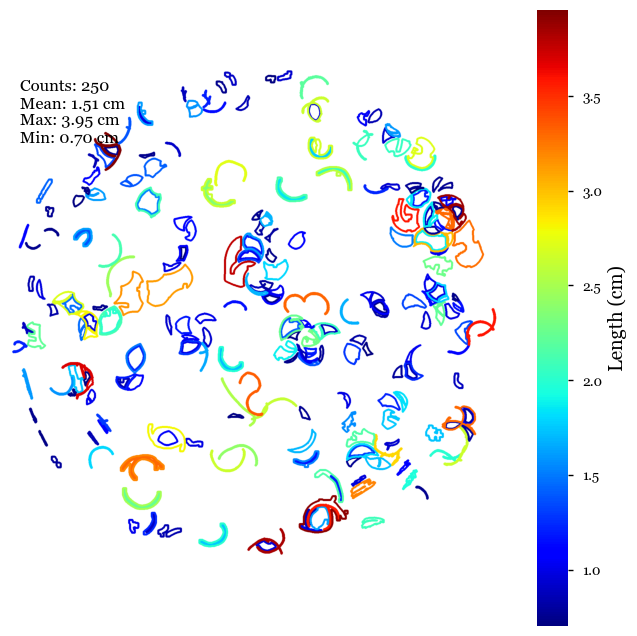

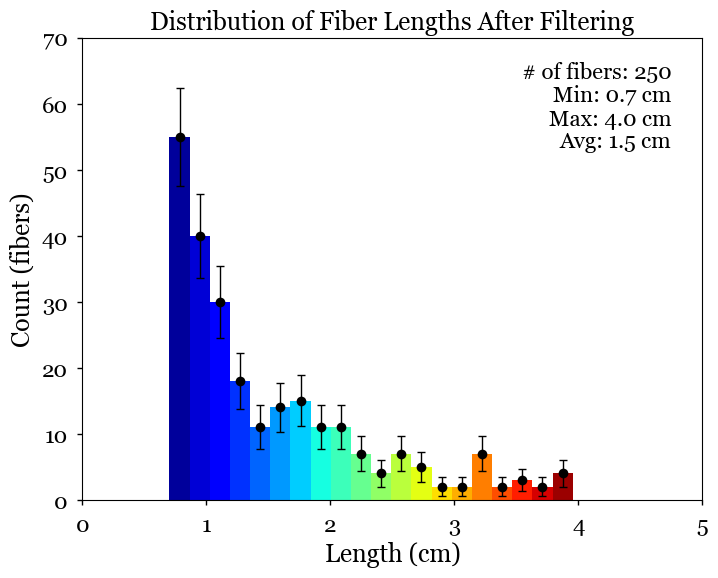

In [312]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Load the original image
image = cv2.imread("/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png")

# Create a white background image
background_image = np.ones_like(image) * 255  # Fills the image with white color (255)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Filter out contours with lengths less than 0.5 cm and more than 4 cm
filtered_contours = []
for contour in contours:
    length_pixels = len(contour)
    length_cm = length_pixels * (12.2 / 1737.0648)
    if 0.7 <= length_cm <= 4:
        filtered_contours.append(contour)

# Draw contours on the white background image
contour_image = cv2.drawContours(background_image, filtered_contours, -1, (45, 45, 183), thickness=1)  # Draw filled contours in black

# Calculate the length of each filtered contour in pixels and centimeters
fiber_lengths_pixels = [len(contour) for contour in filtered_contours]
pixels_to_cm = 12.2 / 1737.0648
fiber_lengths_cm = [length * pixels_to_cm for length in fiber_lengths_pixels]

# Create a colormap based on contour lengths in cm
cmap = plt.cm.jet
norm = plt.Normalize(vmin=min(fiber_lengths_cm), vmax=max(fiber_lengths_cm))
scalar_map = ScalarMappable(norm=norm, cmap=cmap)

# Draw each contour with a color based on its length in cm
for contour, length_cm in zip(filtered_contours, fiber_lengths_cm):
    color = scalar_map.to_rgba(length_cm)
    contour_image = cv2.drawContours(contour_image, [contour], -1, (color[2] * 255, color[1] * 255, color[0] * 255), thickness=5)  

# Display the original image with contours and color bar
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
ax.axis('off')
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical')
cbar.outline.set_edgecolor('none') 
cbar.set_label('Length (cm)', fontsize=14)

# Print the number of counts, mean length, max length, and min length
num_counts = len(filtered_contours)
mean_length = np.mean(fiber_lengths_cm)
max_length = np.max(fiber_lengths_cm)
min_length = np.min(fiber_lengths_cm)
info_text = f"Counts: {num_counts}\nMean: {mean_length:.2f} cm\nMax: {max_length:.2f} cm\nMin: {min_length:.2f} cm"
plt.text(0.02, 0.98, info_text, transform=ax.transAxes, verticalalignment='top', fontsize=12, color='black')

# Plot a histogram of fiber lengths
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(filtered_lengths_cm, bins=20, edgecolor='maroon', linewidth=0)
plt.title('Distribution of Fiber Lengths After Filtering', fontsize=18)
plt.xlabel('Length (cm)', fontsize=18)
plt.ylabel('Count (fibers)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 5)
plt.ylim(0, 70)
plt.grid(False)

# Assign colors to histogram bars based on length values
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for length, patch in zip(bin_centers, patches):
    color = scalar_map.to_rgba(length)
    patch.set_facecolor(color)

# Calculate error bars
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]
error = np.sqrt(n)
#print(n)
# Add error bars
#plt.errorbar(bin_centers, n, xerr=bin_width/2, yerr=error, fmt='o', ecolor='black', lw=1, capsize=3, capthick=1)
plt.errorbar(bin_centers, n, yerr=error, fmt='o', ecolor='black', color = 'k', lw=1, capsize=3, capthick=1)

# Add summary annotations on the plot
plt.text(0.95, 0.95, f"# of fibers: {len(filtered_lengths_cm)}", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.9, f"Min: {np.min(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.85, f"Max: {np.max(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.95, 0.8, f"Avg: {np.mean(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)


plt.show()


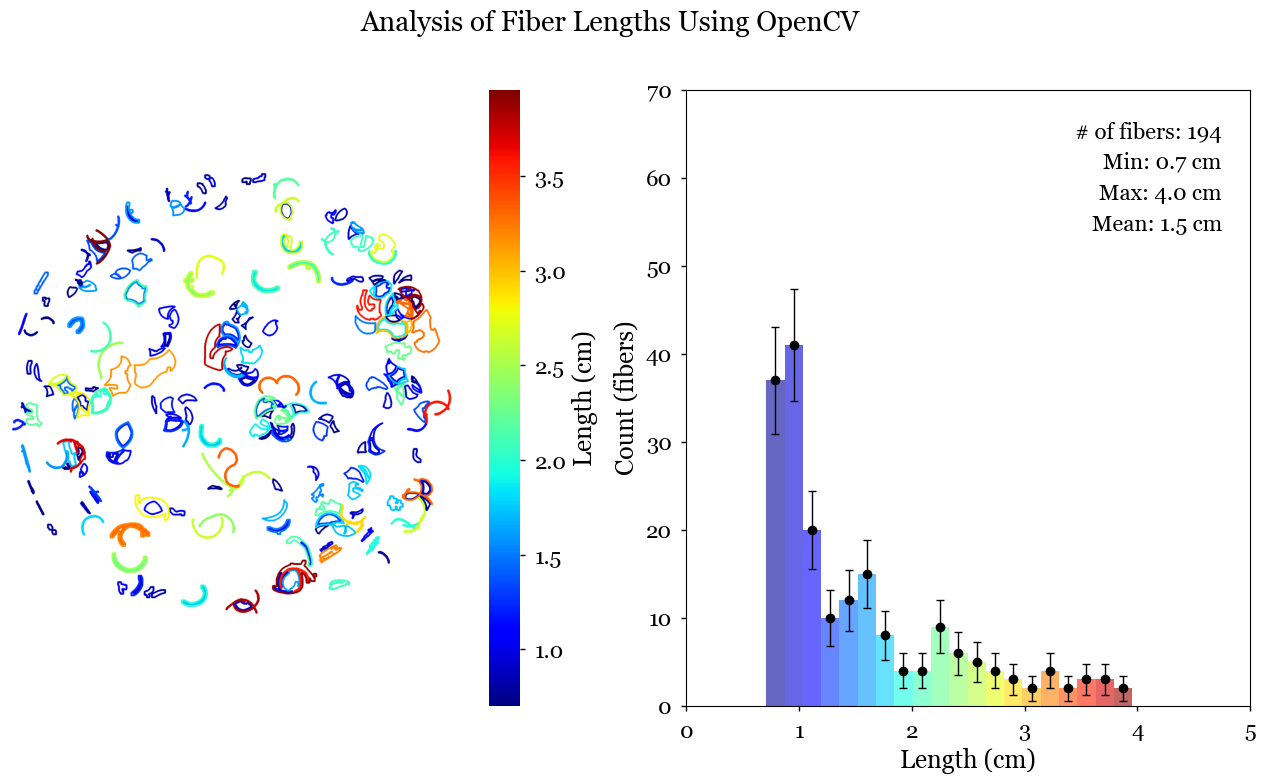

In [354]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Load the original image
image = cv2.imread("/Users/ningravi/Desktop/Python/Clogging Data/IMG_9517_3.png")

# Create a white background image
background_image = np.ones_like(image) * 255  # Fills the image with white color (255)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Filter out contours with lengths less than 0.5 cm and more than 4 cm
filtered_contours = []
for contour in contours:
    length_pixels = len(contour)
    length_cm = length_pixels * (12.2 / 1737.0648)
    if 0.7 <= length_cm <= 4:
        filtered_contours.append(contour)

# Draw contours on the white background image
contour_image = cv2.drawContours(background_image, filtered_contours, -1, (45, 45, 183), thickness=1)  # Draw filled contours in black

# Calculate the length of each filtered contour in pixels and centimeters
fiber_lengths_pixels = [len(contour) for contour in filtered_contours]
pixels_to_cm = 12.2 / 1737.0648
fiber_lengths_cm = [length * pixels_to_cm for length in fiber_lengths_pixels]

# Create a colormap based on contour lengths in cm
cmap = plt.cm.jet
norm = plt.Normalize(vmin=min(fiber_lengths_cm), vmax=max(fiber_lengths_cm))
scalar_map = ScalarMappable(norm=norm, cmap=cmap)

# Draw each contour with a color based on its length in cm
for contour, length_cm in zip(filtered_contours, fiber_lengths_cm):
    color = scalar_map.to_rgba(length_cm)
    contour_image = cv2.drawContours(contour_image, [contour], -1, (color[2] * 255, color[1] * 255, color[0] * 255), thickness=5)  

# Display the original image with contours and color bar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # Adjust figsize if needed
im = ax1.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
ax1.axis('off')
cbar = plt.colorbar(scalar_map, ax=ax1, orientation='vertical')
cbar.outline.set_edgecolor('none') 
cbar.set_label('Length (cm)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

# Print the number of counts, mean length, max length, and min length
num_counts = len(filtered_contours)
mean_length = np.mean(fiber_lengths_cm)
max_length = np.max(fiber_lengths_cm)
min_length = np.min(fiber_lengths_cm)
info_text = f"Counts: {num_counts}\nMin: {min_length:.2f} cm\nMax: {max_length:.2f} cm\nMean: {mean_length:.2f} cm"
#ax1.text(0.02, 1.2, info_text, transform=ax1.transAxes, verticalalignment='top', fontsize=16, color='black')

# Plot a histogram of fiber lengths
n, bins, patches = ax2.hist(filtered_lengths_cm, bins=20, edgecolor='maroon', linewidth=0, alpha=0.6)
#ax2.set_title('Distribution of Fiber Lengths After Filtering', fontsize=18)
ax2.set_xlabel('Length (cm)', fontsize=18)
ax2.set_ylabel('Count (fibers)', fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 70)
ax2.grid(False)

# Assign colors to histogram bars based on length values
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for length, patch in zip(bin_centers, patches):
    color = scalar_map.to_rgba(length)
    patch.set_facecolor(color)

# Calculate error bars
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]
error = np.sqrt(n)
ax2.errorbar(bin_centers, n, yerr=error, fmt='o', ecolor='black', color='k', lw=1, capsize=3, capthick=1)

# Add summary annotations on the plot
ax2.text(0.95, 0.95, f"# of fibers: {len(filtered_lengths_cm)}", ha='right', va='top', transform=ax2.transAxes, fontsize=16)
ax2.text(0.95, 0.9, f"Min: {np.min(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=ax2.transAxes, fontsize=16)
ax2.text(0.95, 0.85, f"Max: {np.max(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=ax2.transAxes, fontsize=16)
ax2.text(0.95, 0.8, f"Mean: {np.mean(filtered_lengths_cm):.1f} cm", ha='right', va='top', transform=ax2.transAxes, fontsize=16)

fig.suptitle('Analysis of Fiber Lengths Using OpenCV', fontsize=20)

#plt.savefig("sum OpenCV.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()
